In [250]:
import pandas as pd
import numpy as np

In [251]:
data = pd.read_csv('USA Housing Dataset.csv')
data = data.drop(['street', 'country','date','sqft_above','sqft_basement'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,city,statezip
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,2008,0,Seattle,WA 98103
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,2007,0,Carnation,WA 98014
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,2010,0,Issaquah,WA 98029
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,2007,0,Seattle,WA 98117
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1979,0,Seattle,WA 98146


In [252]:

categorical_features = ['statezip', 'waterfront', 'city']
data = pd.get_dummies(data, columns=categorical_features,drop_first=True)
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,yr_renovated,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,376000.0,3.0,2.00,1340,1384,3.0,0,3,2008,0,...,False,True,False,False,False,False,False,False,False,False
1,800000.0,4.0,3.25,3540,159430,2.0,0,3,2007,0,...,False,False,False,False,False,False,False,False,False,False
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,2010,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_luxo = data[(data.price > 400000) & (data.price <= 2000000)].copy()
data_padrao = data[data.price <= 400000].copy()

casas_ultra_luxo = len(data[data.price > 2000000])

print(f"Total de casas Ultra-Luxo removidas (acima de R$ 2M): {casas_ultra_luxo}")

Total de casas Ultra-Luxo removidas (acima de R$ 2M): 42


In [254]:
maior_preco = data.price.idxmax()
print(maior_preco)
data = data.drop(1826, axis=0)
removendo_indice = data[data.price <= 0].index
data = data.drop(removendo_indice, axis=0)

iqr_features_padrao = ["price", "sqft_living", "sqft_lot"] 

# limpeza no data_padrao
for feature in iqr_features_padrao: 
    # Calcule os limites apenas no data_padrao
    Q1 = data_padrao[feature].quantile(0.25) 
    Q3 = data_padrao[feature].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    
    # Filtra o data_padrao
    data_padrao = data_padrao[(data_padrao[feature] >= lower_bound) & (data_padrao[feature] <= upper_bound)]

3890


In [255]:
x_luxo = data_luxo.drop('price',axis=1)
y_luxo = data_luxo.price
x_padrao = data_padrao.drop('price',axis=1)
y_padrao = data_padrao.price

In [256]:
data_luxo

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,yr_renovated,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,3,2007,0,...,False,False,False,False,False,False,False,False,False,False
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,5,1979,0,...,False,True,False,False,False,False,False,False,False,False
6,8.750000e+05,4.0,2.00,2520,6000,1.0,0,3,1921,2007,...,False,True,False,False,False,False,False,False,False,False
9,8.425000e+05,4.0,2.50,2160,5298,2.5,0,4,1902,0,...,False,True,False,False,False,False,False,False,False,False
11,1.225000e+06,4.0,4.50,5420,101930,1.0,0,3,2001,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,4.864458e+05,3.0,1.75,1880,10032,1.0,0,4,1984,0,...,False,False,False,False,False,False,False,False,False,False
4125,4.868950e+05,3.0,1.00,1890,3330,1.5,0,4,1901,0,...,False,True,False,False,False,False,False,False,False,False
4126,4.302778e+05,3.0,2.25,1620,1075,3.0,0,3,2009,0,...,False,False,False,False,False,False,False,False,False,False
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1983,2009,...,False,False,False,False,False,False,False,False,False,False


In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [258]:
x_train_luxo, x_test_luxo, y_train_luxo, y_test_luxo = train_test_split(x_luxo,y_luxo,test_size=.33, random_state=42) 
x_train_padrao, x_test_padrao, y_train_padrao, y_test_padrao = train_test_split(x_padrao,y_padrao,test_size=.33, random_state=42)

In [259]:
y_train_luxo_log = np.log1p(y_train_luxo)
y_test_luxo_log = np.log1p(y_test_luxo)

train_cols_luxo = x_train_luxo.columns
x_test_luxo = x_test_luxo.reindex(columns=train_cols_luxo, fill_value=0)

In [260]:
clf_log_luxo = RandomForestRegressor(n_estimators=500, random_state=42).fit(x_train_luxo,y_train_luxo_log)

In [261]:
y_pred_luxo = clf_log_luxo.predict(x_test_luxo)

In [262]:
LOG_LIMITE_SEGURO = 40 

# Aplicar o limite: qualquer previsão acima do limite, é cortada (capping)
y_pred_luxo[y_pred_luxo > LOG_LIMITE_SEGURO] = LOG_LIMITE_SEGURO

# aplicando a reversão novamente:
y_pred_luxo = np.expm1(y_pred_luxo)

In [263]:
mae = mean_absolute_error(y_test_luxo,y_pred_luxo)
print(f'mae luxo {mae:,.2f}')

mse = mean_squared_error(y_test_luxo,y_pred_luxo)
print(f'mse luxo {mse:,.2f}')

r2 = r2_score(y_test_luxo,y_pred_luxo)
print(f'r² luxo {r2:,.2f}')

mae luxo 114,159.15
mse luxo 30,994,749,986.43
r² luxo 0.60


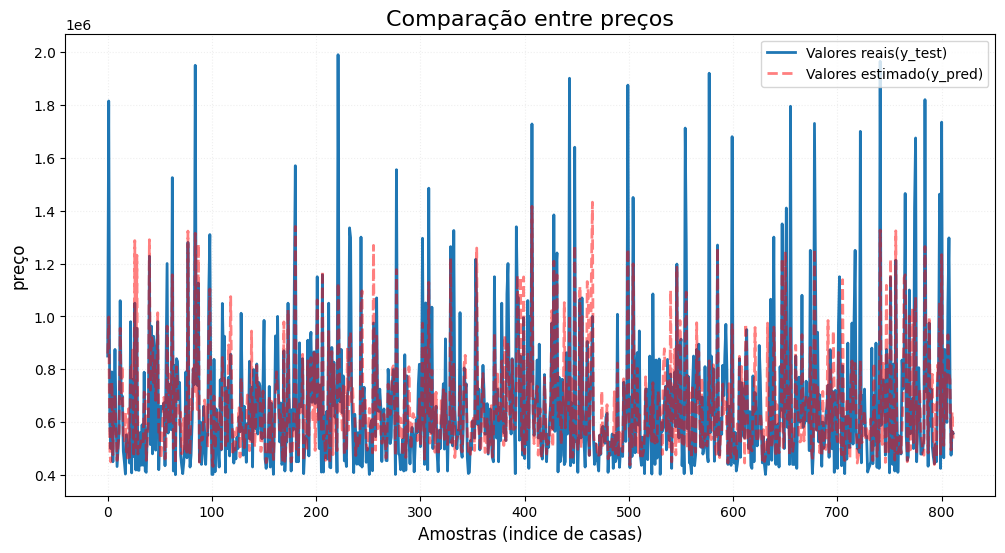

In [264]:
import matplotlib.pyplot as plt 

x = np.arange(len(y_test_luxo))

plt.figure(figsize=(12,6))

plt.plot(x, y_test_luxo, label='Valores reais(y_test)',linewidth=2)
plt.plot(x, y_pred_luxo, label='Valores estimado(y_pred)',color='red', linestyle='--',linewidth=2,alpha=.5)

plt.title('Comparação entre preços', fontsize=16)
plt.xlabel('Amostras (indice de casas)',fontsize=12)
plt.ylabel('preço', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True,linestyle=':', alpha=.2)

plt.show()

In [265]:
clf_log_padrao = RandomForestRegressor(n_estimators=200, random_state=42).fit(x_train_padrao,y_train_padrao)
y_pred_padrao = clf_log_padrao.predict(x_test_padrao)

In [266]:
mae = mean_absolute_error(y_test_padrao,y_pred_padrao)
print(f'mae padrão {mae:,.2f}')

mse = mean_squared_error(y_test_padrao,y_pred_padrao)
print(f'mse padrão {mse:,.2f}')

r2 = r2_score(y_test_padrao,y_pred_padrao)
print(f'r² padrão {r2:,.2f}')

mae padrão 38,926.94
mse padrão 2,379,964,075.64
r² padrão 0.53


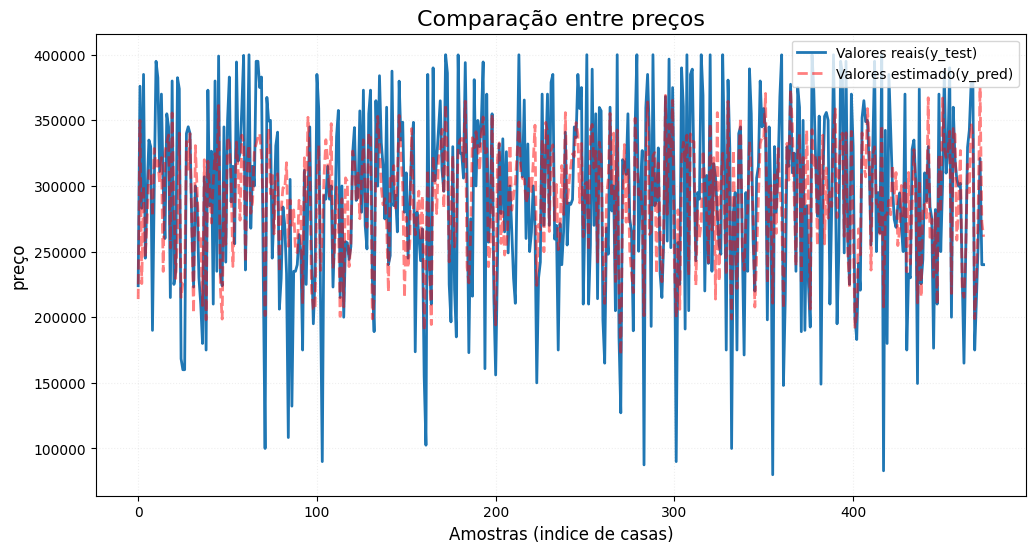

In [267]:
x = np.arange(len(y_test_padrao))

plt.figure(figsize=(12,6))

plt.plot(x, y_test_padrao, label='Valores reais(y_test)',linewidth=2)
plt.plot(x, y_pred_padrao, label='Valores estimado(y_pred)',color='red', linestyle='--',linewidth=2,alpha=.5)

plt.title('Comparação entre preços', fontsize=16)
plt.xlabel('Amostras (indice de casas)',fontsize=12)
plt.ylabel('preço', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True,linestyle=':', alpha=.2)

plt.show()

In [268]:
preco_medio = data_luxo.price.mean()
print(preco_medio)

682743.2044426707


In [269]:
y_teste_combinado = np.concatenate([y_test_luxo, y_test_padrao])

# Combinação das Previsões (y_pred)o
y_pred_combinado = np.concatenate([y_pred_luxo, y_pred_padrao])

# Avaliação Global
r2_combinado = r2_score(y_teste_combinado, y_pred_combinado)
mae_combinado = mean_absolute_error(y_teste_combinado, y_pred_combinado)
mse_combinado = mean_squared_error(y_teste_combinado, y_pred_combinado)
rmse_combinado = np.sqrt(mse_combinado)

print(f"R² Global: {r2_combinado:,.4f}")
print(f"MAE Global: R$ {mae_combinado:,.2f}")
print(f"RMSE Global: R$ {rmse_combinado:,.2f}")

R² Global: 0.7603
MAE Global: R$ 86,429.71
RMSE Global: R$ 142,995.72


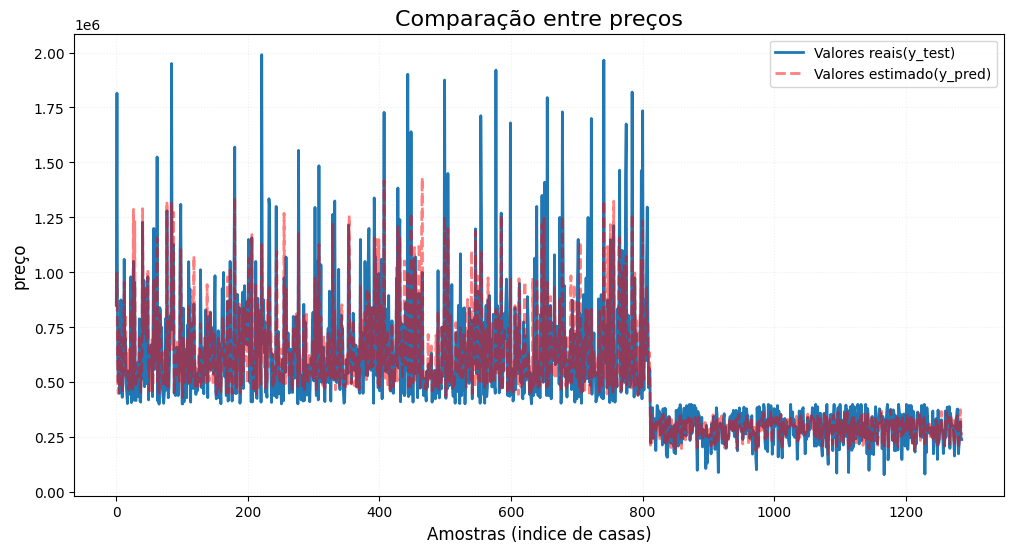

In [ ]:
x = np.arange(len(y_teste_combinado))

plt.figure(figsize=(12,6))

plt.plot(x, y_teste_combinado, label='Valores reais(y_test)',linewidth=2)
plt.plot(x, y_pred_combinado, label='Valores estimado(y_pred)',color='red', 
         linestyle='--', linewidth=2, alpha=.5)


# plt.ylim(0, 2500000)
plt.title('Comparação entre preços', fontsize=16)
plt.xlabel('Amostras (indice de casas)',fontsize=12)
plt.ylabel('preço', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True,linestyle=':', alpha=.2)

plt.show()